# Dogs vs Cats

The main goal of this project is to show how images can be classified using keras/tensorflow. The challenge faced is to classify if a given picture has a dog or a cat on it. To accomplish this, I employ different techniques and compare their outputs. Finally, I test the best model using pictures downloaded from google images.

### Contents
1. [Method](#Method)
2. [Importing Data](#Importing-Data)
3. [Baseline Model](#Baseline-Model)
4. [Transfer Learning (VGG16)](#Transfer-Learning-(VGG16))
5. [Comparing Models](#Comparing-Models)
6. [Tests](#Tests)
7. [Conclusion](#Conclusion)

### Method
The following method is adopted in this project:
![fig](images/method.png)

1. I import the dataset; 
2. The baseline model is defined and trained; 
3. I also consider a model that uses transfer learning to improve its performance;
4. The results of both models are compared;
5. Both models are tested against 1000 images.

### Importing Data

This dataset can be accessed at [kaggle](https://www.kaggle.com/c/dogs-vs-cats/data). The data is composed of 10,000 images of dogs and cats (5,000 each), including train and test data. To accomplish our goal, we can use keras' functions to prepare the data to be fed into the neural networks.

Here I import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_files
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm

After that I use the ImageDataGenerator function to prepare the training and validation datasets. ImageDataGenerator enables us to perform data augmentations (i.e,., we change the initial configuration of images - e.g., size or position - to make our models more accurate).

Then, we use the flow_from_directory function to apply these augmentation as well as to load the data from a local directory (in this case, "dataset/training_set").

In [2]:
train_datagen = ImageDataGenerator( rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest',
                                    validation_split=0.2)

train_generator = train_datagen.flow_from_directory("dataset/training_set",
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory("dataset/training_set",
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    subset='validation')

Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


As we do not need to augment the test data, I only rescale it and load the images from the directory ("dataset/test_set"). Note that we have 8000 images for training and 2000 for test.

In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory("dataset/test_set", 
                                                                    target_size=(150,150),
                                                                    batch_size=20,
                                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.


# Baseline Model

The baseline model consists of 3 Conv2D layers (followed by MaxPooling2D layers) and 1 Dense layer of 512 hidden nodes with 'relu' as activation function. Note that the last layer presents only 1 hidden node and this is because we have two classes (i.e., dog and cat are mapped onto [0,1]). Besides, the activation function of this layer is 'sigmoid'. 

Note that the metric considered is accuracy and the loss function to be minimized is the 'binary_crossentropy' - which is suitable for problems with two classes.

In [6]:
import tensorflow as tf

baseline_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(63, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
baseline_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001),
              loss = 'binary_crossentropy',
              metrics = ['acc'])
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 63)        18207     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 63)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18207)             0

In [7]:
baseline_history = baseline_model.fit_generator(train_generator, 
                              steps_per_epoch=100,
                              epochs = 15,
                              validation_data=validation_generator,
                              validation_steps=50,
                              verbose=1)

C:\Users\neto\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
100/100 [==============================] - 53s 520ms/step - loss: 0.7258 - acc: 0.5001 - val_loss: 0.6810 - val_acc: 0.5730
Epoch 2/15
100/100 [==============================] - 51s 505ms/step - loss: 0.6843 - acc: 0.5636 - val_loss: 0.6732 - val_acc: 0.5600
Epoch 3/15
100/100 [==============================] - 51s 505ms/step - loss: 0.6728 - acc: 0.5956 - val_loss: 0.6544 - val_acc: 0.6320
Epoch 4/15
100/100 [==============================] - 51s 507ms/step - loss: 0.6463 - acc: 0.6393 - val_loss: 0.6328 - val_acc: 0.6450
Epoch 5/15
100/100 [==============================] - 52s 514ms/step - loss: 0.6503 - acc: 0.6088 - val_loss: 0.6379 - val_acc: 0.6390
Epoch 6/15
100/100 [==============================] - 51s 505ms/step - loss: 0.6312 - acc: 0.6572 - val_loss: 0.6599 - val_acc: 0.6200
Epoch 7/15
100/100 [==============================] - 51s 509ms/step - loss: 0.6444 - acc: 0.6336 - val_loss: 0.6257 - val_acc: 0.6500
Epoch 8/15
100/100 [==============================] - 5

# Transfer Learning (VGG16)

An alternative approach to the baseline model is to use powerful neural networks that have been trained before in powerful machines. VGG16 is one famous model that can be used to improve our results. The original VGG16 version presents the following configuration:
![fig](images/VGG16.png)
In this project, the idea is to use all image-related layers (e.g., Conv2D) that are powerful and can detect many caracteristics of images (e.g., edges) and include dense layers in the top of if to ensure the model is trained for our porpuse.

In [8]:
VGG16_pre_trained_model = tf.keras.applications.VGG16(input_shape=(150,150,3),
                                                           include_top = False,
                                                           weights='imagenet')


As we do not want to re-train the VGG16 model, I just set them as 'trainable=False'

In [9]:
for layer in VGG16_pre_trained_model.layers:
    layer.trainable = False

In [10]:
VGG16_pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Now, it is time to connect our layers to it. To accomplish that, I simply selected the output of the last layer and added dense layers (128 hidden nodes, 'relu' as activation function).

Please note that when we run, for example, "x = tf.keras.layers.Flatten()(last_output)" we are defining a Flatten layer with the input shape of "last_output". This follows the definitions of the other layers.

In [11]:
last_layer = VGG16_pre_trained_model.layers[-1]
last_output = last_layer.output
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

Here I combined VGG16 (pre_trained_model) with our layers (x) and printed a summary of the final model.

In [14]:
from tensorflow.keras.optimizers import RMSprop
VGG16_pre_trained_model = tf.keras.Model(VGG16_pre_trained_model.input, x)
VGG16_pre_trained_model.compile(optimizer = RMSprop(lr=0.0001),
              loss = 'binary_crossentropy',
              metrics = ['acc'])
VGG16_pre_trained_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [15]:
VGG16_history = VGG16_pre_trained_model.fit_generator(train_generator, 
                              steps_per_epoch=100,
                              epochs = 15,
                              validation_data=validation_generator,
                              validation_steps=50,
                              verbose=1)

Epoch 1/15
100/100 [==============================] - 378s 4s/step - loss: 0.6102 - acc: 0.6561 - val_loss: 0.4358 - val_acc: 0.8000
Epoch 2/15
100/100 [==============================] - 371s 4s/step - loss: 0.4434 - acc: 0.7878 - val_loss: 0.4176 - val_acc: 0.7970
Epoch 3/15
100/100 [==============================] - 370s 4s/step - loss: 0.3858 - acc: 0.8231 - val_loss: 0.4189 - val_acc: 0.7890
Epoch 4/15
100/100 [==============================] - 369s 4s/step - loss: 0.3619 - acc: 0.8342 - val_loss: 0.3486 - val_acc: 0.8360
Epoch 5/15
100/100 [==============================] - 384s 4s/step - loss: 0.3736 - acc: 0.8278 - val_loss: 0.3500 - val_acc: 0.8400
Epoch 6/15
100/100 [==============================] - 384s 4s/step - loss: 0.3516 - acc: 0.8358 - val_loss: 0.3268 - val_acc: 0.8650
Epoch 7/15
100/100 [==============================] - 379s 4s/step - loss: 0.3751 - acc: 0.8333 - val_loss: 0.3386 - val_acc: 0.8420
Epoch 8/15
100/100 [==============================] - 384s 4s/step - 

### Comparing Models

To compare the results of both model, I plotted the accuracy achieved in each epoch (for training and validation).

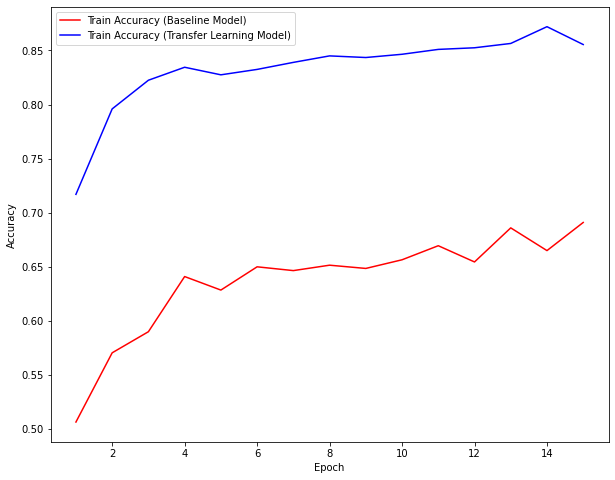

In [17]:
epochs = list(range(1,16))

baseline_accuracy = baseline_history.history['acc']
transfer_learning_accuracy = VGG16_history.history['acc']

plt.figure(figsize=(10,8))
plt.plot(epochs, baseline_accuracy, color='red', label='Train Accuracy (Baseline Model)')
plt.plot(epochs, transfer_learning_accuracy, color='blue', label='Train Accuracy (Transfer Learning Model)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

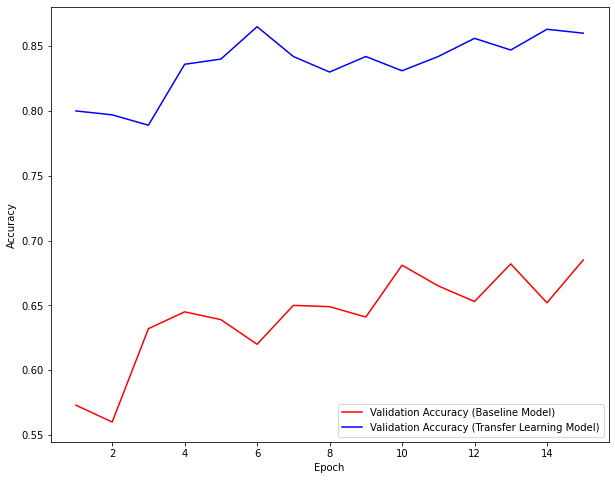

In [19]:
epochs = list(range(1,16))

baseline_accuracy = baseline_history.history['val_acc']
transfer_learning_accuracy = VGG16_history.history['val_acc']

plt.figure(figsize=(10,8))
plt.plot(epochs, baseline_accuracy, color='red', label='Validation Accuracy (Baseline Model)')
plt.plot(epochs, transfer_learning_accuracy, color='blue', label='Validation Accuracy (Transfer Learning Model)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

Besides, the loss achieved in each epoch is also plotted (for training and validation)

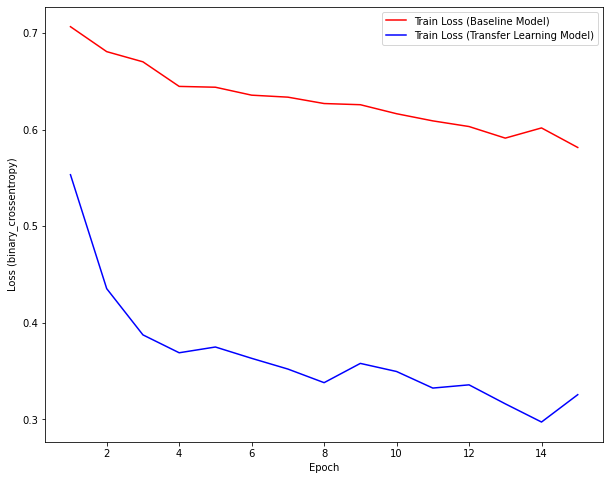

In [20]:
epochs = list(range(1,16))

baseline_loss = baseline_history.history['loss']
transfer_learning_loss = VGG16_history.history['loss']

plt.figure(figsize=(10,8))
plt.plot(epochs, baseline_loss, color='red', label='Train Loss (Baseline Model)')
plt.plot(epochs, transfer_learning_loss, color='blue', label='Train Loss (Transfer Learning Model)')
plt.xlabel('Epoch')
plt.ylabel('Loss (binary_crossentropy)')
plt.legend()

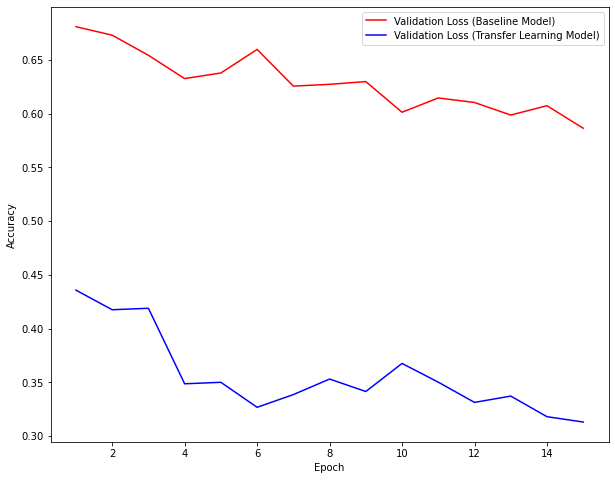

In [21]:
epochs = list(range(1,16))

baseline_loss = baseline_history.history['val_loss']
transfer_learning_loss = VGG16_history.history['val_loss']

plt.figure(figsize=(10,8))
plt.plot(epochs, baseline_loss, color='red', label='Validation Loss (Baseline Model)')
plt.plot(epochs, transfer_learning_loss, color='blue', label='Validation Loss (Transfer Learning Model)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

### Tests

To offer a visual understanding of the test data, I just plotted one dog image and one cat image.

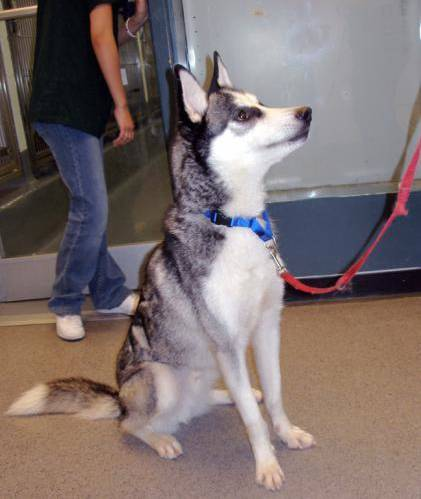

In [22]:
from IPython.display import Image
Image('dataset/test_set/dogs/dog.4001.jpg')

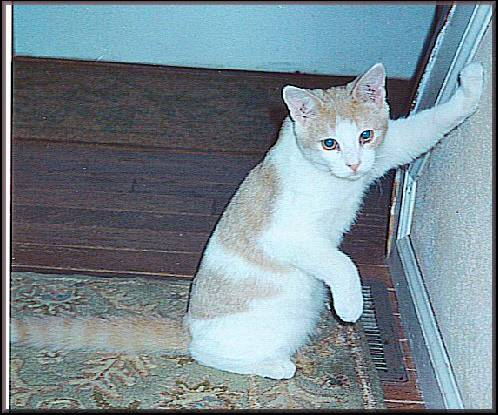

In [23]:
Image('dataset/test_set/cats/cat.4001.jpg')

Now, let's evaluate the performance of the baseline model.

In [24]:
y_true = []
y_pred = []
for i in tqdm(range(4001, 5000)):
    # testing it for dog image
    y_true += [1]
    filename = 'dataset/test_set/dogs/dog.{}.jpg'.format(i)
    img = tf.keras.preprocessing.image.load_img(filename, target_size = (150,150))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = baseline_model.predict(images, batch_size=10)
    y_pred.append(round(pred[0][0]))
    
    # testing it for cat image
    y_true += [0]
    filename = 'dataset/test_set/cats/cat.{}.jpg'.format(i)
    img = tf.keras.preprocessing.image.load_img(filename, target_size = (150,150))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = baseline_model.predict(images, batch_size=10)
    y_pred.append(round(pred[0][0]))

100%|████████████████████████████████████████████████████████████████████████████████| 999/999 [02:02<00:00,  8.19it/s]


In [25]:
from sklearn.metrics import accuracy_score, f1_score
print('baseline_acc = ', accuracy_score(y_true, y_pred))
print('baseline_f1_score = ', f1_score(y_true, y_pred))

baseline_acc =  0.521021021021021
baseline_f1_score =  0.6734902763561925


In [26]:
y_true_VGG16 = []
y_pred_VGG16 = []
for i in tqdm(range(4001, 5000)):
    # testing it for dog image
    y_true_VGG16 += [1]
    filename = 'dataset/test_set/dogs/dog.{}.jpg'.format(i)
    img = tf.keras.preprocessing.image.load_img(filename, target_size = (150,150))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = VGG16_pre_trained_model.predict(images, batch_size=10)
    y_pred_VGG16.append(round(pred[0][0]))
    
    # testing it for cat image
    y_true_VGG16 += [0]
    filename = 'dataset/test_set/cats/cat.{}.jpg'.format(i)
    img = tf.keras.preprocessing.image.load_img(filename, target_size = (150,150))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = VGG16_pre_trained_model.predict(images, batch_size=10)
    y_pred_VGG16.append(round(pred[0][0]))

100%|████████████████████████████████████████████████████████████████████████████████| 999/999 [06:13<00:00,  2.68it/s]


In [27]:
from sklearn.metrics import accuracy_score, f1_score
print('transfer_learning_acc = ', accuracy_score(y_true_VGG16, y_pred_VGG16))
print('transfer_learning_f1_score = ', f1_score(y_true_VGG16, y_pred_VGG16))

transfer_learning_acc =  0.7947947947947948
transfer_learning_f1_score =  0.829308909242298


### Conclusion

Even though I trained the models with a reduced number of epochs (15), interesting results were achieved.

The baseline model did not perform well due to the reduced training exposure, with 52% accuracy and an F1-score of 67% (which shows how well the model is classifying both classes);

However, there is a clear improvement in the results when we use transfer learning. In that case, the model presented ~79.4 accuracy and a F1-score of 82.9.

Text(0, 0.5, 'accuracy')

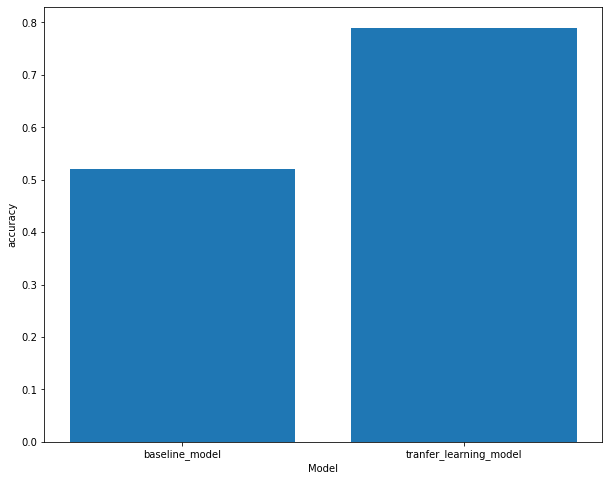

In [29]:
epochs = list(range(1,16))

plt.figure(figsize=(10,8))
plt.bar(['baseline_model', 'tranfer_learning_model'], [0.52, 0.79])
plt.xlabel('Model')
plt.ylabel('accuracy')

Text(0, 0.5, 'F1-score')

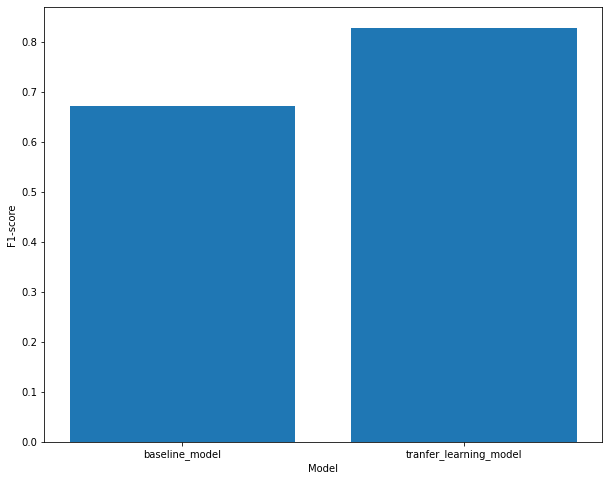

In [30]:
epochs = list(range(1,16))

plt.figure(figsize=(10,8))
plt.bar(['baseline_model', 'tranfer_learning_model'], [0.673, 0.829])
plt.xlabel('Model')
plt.ylabel('F1-score')